<a href="https://colab.research.google.com/github/yashyasviagarwal/TcsHumain/blob/master/Vehicle_License_Plate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip darknet.zip -d /content/

Archive:  darknet.zip
   creating: /content/darknet/
  inflating: /content/darknet/yolo-voc_800.weights  
   creating: /content/__MACOSX/
   creating: /content/__MACOSX/darknet/
  inflating: /content/__MACOSX/darknet/._yolo-voc_800.weights  
   creating: /content/darknet/obj/
  inflating: /content/darknet/obj/detection_layer.o  
   creating: /content/__MACOSX/darknet/obj/
  inflating: /content/__MACOSX/darknet/obj/._detection_layer.o  
  inflating: /content/darknet/obj/option_list.o  
  inflating: /content/__MACOSX/darknet/obj/._option_list.o  
  inflating: /content/darknet/obj/box.o  
  inflating: /content/__MACOSX/darknet/obj/._box.o  
  inflating: /content/darknet/obj/utils.o  
  inflating: /content/__MACOSX/darknet/obj/._utils.o  
  inflating: /content/darknet/obj/image_opencv.o  
  inflating: /content/__MACOSX/darknet/obj/._image_opencv.o  
  inflating: /content/darknet/obj/logistic_layer.o  
  inflating: /content/__MACOSX/darknet/obj/._logistic_layer.o  
  inflating: /content/dar

# SOME REQUIRED INSTALLATIONS

In [0]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 7s (708 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/D

In [0]:
!git clone https://github.com/yashyasviagarwal/TcsHumainDatabase

Cloning into 'TcsHumainDatabase'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


# **PLATE DETECTION(USING YOLOV2)**



YOLO is not a traditional classifier that is repurposed to be an object detector. YOLO actually looks at the image just once (hence its name: You Only Look Once) but in a clever way.

YOLO divides up the image into a grid of 13 by 13 cells:

![](https://machinethink.net/images/yolo/Grid@2x.png)

The 13x13 grid
Each of these cells is responsible for predicting 5 bounding boxes. A bounding box describes the rectangle that encloses an object.

YOLO also outputs a confidence score that tells us how certain it is that the predicted bounding box actually encloses some object. This score doesn’t say anything about what kind of object is in the box, just if the shape of the box is any good.

The predicted bounding boxes may look something like the following (the higher the confidence score, the fatter the box is drawn):

![](https://machinethink.net/images/yolo/Boxes@2x.png)

The bounding boxes predicted by the grid cells
For each bounding box, the cell also predicts a class. This works just like a classifier: it gives a probability distribution over all the possible classes. The version of YOLO we’re using is trained on the PASCAL VOC dataset, which can detect 20 different classes such as:

* bicycle
* boat
* car
* cat
* dog
* person
* and so on…

The confidence score for the bounding box and the class prediction are combined into one final score that tells us the probability that this bounding box contains a specific type of object. For example, the big fat yellow box on the left is 85% sure it contains the object “dog”:

![](https://machinethink.net/images/yolo/Scores@2x.png)

The bounding boxes with their class scores
Since there are 13×13 = 169 grid cells and each cell predicts 5 bounding boxes, we end up with 845 bounding boxes in total. It turns out that most of these boxes will have very low confidence scores, so we only keep the boxes whose final score is 30% or more (you can change this threshold depending on how accurate you want the detector to be).

The final prediction is then:

![](https://machinethink.net/images/yolo/Prediction@2x.png)

The final prediction
From the 845 total bounding boxes we only kept these three because they gave the best results. But note that even though there were 845 separate predictions, they were all made at the same time — the neural network just ran once. And that’s why YOLO is so powerful and fast.

(The above pictures are from pjreddie.com.)

# The neural network

The architecture of YOLO is simple, it’s just a convolutional neural network:

Layer         kernel  stride  output shape
---------------------------------------------
Input                          (416, 416, 3)
Convolution    3×3      1      (416, 416, 16)
MaxPooling     2×2      2      (208, 208, 16)
Convolution    3×3      1      (208, 208, 32)
MaxPooling     2×2      2      (104, 104, 32)
Convolution    3×3      1      (104, 104, 64)
MaxPooling     2×2      2      (52, 52, 64)
Convolution    3×3      1      (52, 52, 128)
MaxPooling     2×2      2      (26, 26, 128)
Convolution    3×3      1      (26, 26, 256)
MaxPooling     2×2      2      (13, 13, 256)
Convolution    3×3      1      (13, 13, 512)
MaxPooling     2×2      1      (13, 13, 512)
Convolution    3×3      1      (13, 13, 1024)
Convolution    3×3      1      (13, 13, 1024)
Convolution    1×1      1      (13, 13, 125)
---------------------------------------------

This neural network only uses standard layer types: convolution with a 3×3 kernel and max-pooling with a 2×2 kernel. No fancy stuff. There is no fully-connected layer in YOLOv2.


The very last convolutional layer has a 1×1 kernel and exists to reduce the data to the shape 13×13×125. This 13×13 should look familiar: that is the size of the grid that the image gets divided into.

So we end up with 125 channels for every grid cell. These 125 numbers contain the data for the bounding boxes and the class predictions. Why 125? Well, each grid cell predicts 5 bounding boxes and a bounding box is described by 25 data elements:

* x, y, width, height for the bounding box’s rectangle
* the confidence score
* the probability distribution over the 20 classes

Using YOLO is simple: you give it an input image (resized to 416×416 pixels), it goes through the convolutional network in a single pass, and comes out the other end as a 13×13×125 tensor describing the bounding boxes for the grid cells. All you need to do then is compute the final scores for the bounding boxes and throw away the ones scoring lower than 30%.

# The YOLOv2 Architecture

![](https://www.researchgate.net/profile/Saeed_Masoudnia/publication/333609719/figure/fig3/AS:766059422429186@1559654207151/YOLOv2-architecture-YOLOv2-architecture-is-modified-with-our-new-assisted-excitation.ppm)

# LETS GET STARTED BY DETECTING OUR TEST IMAGES!

In [0]:
%cd darknet

/content/darknet


In [0]:
from PIL import Image
from google.colab import files
uploaded = files.upload()
input_img=list(uploaded.keys())[0]
print("\n\nPLEASE ENTER THIS IMAGE NAME AS LAST INPUT <REPLACE 'IMAGE_NAME'>IN THE YOLO DETECTING CELL BELOW \nTHE IMAGE NAME IS:",input_img)
#./darknet detector test cfg/obj.data cfg/yolo-voc.2.0.cfg /content/darknet/yolo-voc_800.weights IMAGE_NAME


Saving a.jpg to a (2).jpg


PLEASE ENTER THIS IMAGE NAME AS LAST INPUT <REPLACE 'IMAGE_NAME'>IN THE YOLO DETECTING CELL BELOW 
THE IMAGE NAME IS: a.jpg


In [0]:
!./darknet detector test cfg/obj.data cfg/yolo-voc.2.0.cfg /content/darknet/yolo-voc_800.weights a.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  32   ->   208 x 208 x  32
    2 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  64   ->   104 x 104 x  64
    4 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    5 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    6 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    7 max          2 x 2 / 2   104 x 104 x 128   ->    52 x  52 x 128
    8 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
    9 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128  0.177 BFLOPs
   10 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256  1.595 BFLOPs
   11 max          2 x 2 / 2    52 x  52 x 256   ->

## **DISPLAYING THE DETECTED PLATE**


INPUT IMAGE



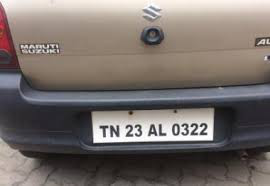


YOLO OUTPUT IMAGE



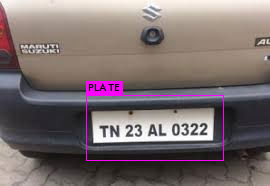


CROPPED IMAGE



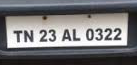





INPUT IMAGE



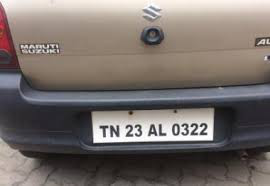


YOLO OUTPUT IMAGE



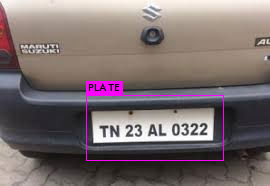


CROPPED IMAGE



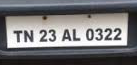

<function TextIOWrapper.close>

In [0]:
import requests
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import urllib
import cv2
import json
im = np.array(Image.open("/content/darknet/"+input_img))
carImage = Image.fromarray(im)
f=open("/content/darknet/result.txt", "r")
if f.mode == 'r':
  contents = f.readlines()
  for i in range (len(contents)):
    contents[i]=list(map(float,contents[i].strip().split()))
  for lines in contents:
    x_point_top=lines[0]
    y_point_top=lines[1]
    x_point_bot=lines[2]
    y_point_bot=lines[3]
    plateImage = carImage.crop((x_point_top, y_point_top, x_point_bot,  y_point_bot))
#     #Plot Images 
#     import matplotlib.pyplot as plt
#     import matplotlib.patches as patches

#     # Create figure and axes
#     fig, ax = plt.subplots(3, 1, constrained_layout=True)

#     # Set title
#     ax[0].set_title('Input Image')
#     ax[1].set_title('YOLO Output Image')
#     ax[2].set_title('Cropped Image')
#     ax[0].imshow(carImage)
#     ax[1].imshow(Image.open('/content/darknet/predictions.jpg'))
#     ax[2].imshow(plateImage)
#     plt.show()
    print("\nINPUT IMAGE\n")
    display(carImage)
    print("\nYOLO OUTPUT IMAGE\n")
    display(Image.open('/content/darknet/predictions.jpg'))
    print("\nCROPPED IMAGE\n")
    display(plateImage)
    print("\n\n")
f.close

# IMAGE PREPROCESSING

## Image Blurring

## What is convolution in 2D?
Image is denoted as matrix inside computer. An image contains a lot of features like edge, contrast etc. In image processing features have to be extracted from the image for further study of image.
Convolution is a fundamental operation on images in which a mathematical operation is applied to each pixel to get the desired result.
For this purpose, another matrix called as kernel is used which is smaller in size of image. This is also called filter. This filter is applied on each pixel of the image and new value obtained is the value of that pixel. The image obtained is called filtered image.
In kernel each cell contain some value, that kernel is kept above the pixel and corresponding values are multiplied and then summed up this value obtained is new the value of pixel.

![](https://media.geeksforgeeks.org/wp-content/uploads/Untitled-drawing-3-4.jpg)

## What is Blurring
If a blurred image is observed carefully then a common thing to notice is that image is smooth meaning edges are not observed. A filter used for blurring is also called low pass filter, because it allows low frequency to enter and stop high frequency. Here frequency means the change of pixel value. Around edge pixel value changes rapidly as blur image is smooth so high frequency should be filtered out.
For blur purpose a filter with every call having value 1 is used because to blur image a pixel value should be close to neighbor value.
In filter it is divided by 9 for normalization otherwise value of a pixel will increase resulting in more contrast which is not the goal.

![](https://media.geeksforgeeks.org/wp-content/uploads/Untitled-drawing-4-3.jpg)


We can choose the size of the kernel depending on how much we want to smoothen the image. Choosing a bigger size will be averaging over a larger area. This tends to increase the smoothening effect.

### Example

### Original

![](https://media.geeksforgeeks.org/wp-content/uploads/ima1.png)

### Blurred with filter of 5 x 5

![](https://media.geeksforgeeks.org/wp-content/uploads/img2-10.png)


## Conversion To Grayscale

We convert the image to grayscale because we do not need the colours for OCR and removing colours woud help in decreasing computation over each pixel as we would have only two colours(Black & White) to compare.

### Example

![](https://dev-akash.github.io/images/grayscale-conversion.PNG)


## Image Thresholding

Image thresholding is a simple, yet effective, way of partitioning an image into a foreground and background. This image analysis technique is a type of image segmentation that isolates objects by converting grayscale images into binary images. Image thresholding is most effective in images with high levels of contrast.

## Adaptive Thresholding

A global value as threshold value, may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

### Adaptive Method - It decides how thresholding value is calculated.
* cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
* cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

Block Size - It decides the size of neighbourhood area.

C - It is just a constant which is subtracted from the mean or weighted mean calculated.

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/ada_threshold.jpg)

## Otsu’s Binarization

In global thresholding, we used an arbitrary value for threshold value, right? So, how can we know a value we selected is good or not? Answer is, trial and error method. But consider a bimodal image (In simple words, bimodal image is an image whose histogram has two peaks). For that image, we can approximately take a value in the middle of those peaks as threshold value, right ? That is what Otsu binarization does. So in simple words, it automatically calculates a threshold value from image histogram for a bimodal image. (For images which are not bimodal, binarization won’t be accurate.)

For this, our cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If Otsu thresholding is not used, retVal is same as the threshold value you used.

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/otsu.jpg)

In [0]:
#import required Libraries
import numpy as np
import cv2
from copy import deepcopy
from PIL import Image
import pytesseract as tess
import random

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from google.colab.patches import cv2_imshow

detected_plates=[]

#function to preprocess the image
def preprocess(img):
#   #display input image
#   fig, ax = plt.subplots(3, 1, constrained_layout=True)
#   ax[0].set_title('Input Image')
#   ax[0].imshow(img)
#   #we now remove Gaussian Noise from the image
#   imgBlurred = cv2.GaussianBlur(np.asarray(img), (5,5), 0)
#   #convert image to grascale
#   gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY)
#   #we apply sobel mask to detect vertical and horizontal edges of the image
#   sobelx = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=3)
#   ax[1].set_title('Sobel Image')
#   ax[1].imshow(sobelx)
#   #we now convert the image into binary using otsu threshold
#   ret2,threshold_img = cv2.threshold(sobelx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#   ax[2].set_title('Threshold Image')
#   ax[2].imshow(threshold_img)
#   plt.show()
#   #return the threshold image
#   return threshold_img
    #display input image
    fig, ax = plt.subplots(4, 1, constrained_layout=True)
    ax[0].set_title('Input Image')
    ax[0].imshow(img)
    #we now remove Gaussian Noise from the image
    imgBlurred = cv2.GaussianBlur(np.asarray(img), (5,5), 0)
    imgBlurred = cv2.GaussianBlur(np.asarray(img), (3,3), 0)
    ax[1].set_title('Blurred Image')
    ax[1].imshow(imgBlurred)
    #convert image to grayscale
    gray = cv2.cvtColor(imgBlurred, cv2.COLOR_BGR2GRAY)
    ax[2].set_title('Grayscale Image')
    ax[2].imshow(gray,cmap="gray")
    #we now convert the image into binary using otsu threshold
    ret2,threshold_img = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    ax[3].set_title('Threshold Image')
    ax[3].imshow(threshold_img)
    plt.show()
    return threshold_img

#function to perform cleaning operations
def cleanPlate(plate):
  print ("CLEANING PLATE. . .")
  #convert to gray
  gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
	#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
	#thresh= cv2.dilate(gray, kernel, iterations=1)
  
  #detect conoturs from threshold image
  _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
  im1,contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
  #check if there are extracted counters
  if contours:
    #all regions for detected contours
    areas = [cv2.contourArea(c) for c in contours]
    max_index = np.argmax(areas)
    max_cnt = contours[max_index]
    max_cntArea = areas[max_index]
    x,y,w,h = cv2.boundingRect(max_cnt)
    #check if ratio of plate to image size is normal
    if not ratioCheck(max_cntArea,w,h):
      return plate,None
    #return cleaned plate
    cleaned_final = thresh[y:y+h, x:x+w]
    return cleaned_final,[x,y,w,h]
  else:
    return plate,None


def extract_contours(threshold_img):
  #create a morphed image
  element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
  morph_img_threshold = threshold_img.copy()
  cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
  plt.title("Morphed")
  plt.imshow(morph_img_threshold)
  plt.show()
  cv2.waitKey(0)
  #extract contours
  im2,contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
  return contours


def ratioCheck(area, width, height):
  #check the width to height ratio and return true if it is within limits
	ratio = float(width) / float(height)
	if ratio < 1:
		ratio = 1 / ratio

	aspect = 4.7272
	min = 15*aspect*15  # minimum area
	max = 125*aspect*125  # maximum area

	rmin = 3
	rmax = 6

	if (area < min or area > max) or (ratio < rmin or ratio > rmax):
		return False
	return True

def isMaxWhite(plate):
	avg = np.mean(plate)
	if(avg>=115):
		return True
	else:
 		return False

def validateRotationAndRatio(rect):
  #function to validate the rotation and check if the image is not skewed extremely
	(x, y), (width, height), rect_angle = rect

	if(width>height):
		angle = -rect_angle
	else:
		angle = 90 + rect_angle

	if angle>15:
	 	return False

	if height == 0 or width == 0:
		return False

	area = height*width
	if not ratioCheck(area,width,height):
		return False
	else:
		return True



def cleanAndRead(img,contours):
  #function to loop over all contours and then read the Characters from the Image.
  flag=0
  for i,cnt in enumerate(contours):
    min_rect = cv2.minAreaRect(cnt)
    if validateRotationAndRatio(min_rect):
      x,y,w,h = cv2.boundingRect(cnt)
      img=np.array(img)
      plate_img = img[y:y+h,x:x+w]
      if(isMaxWhite(plate_img)):
        clean_plate, rect = cleanPlate(plate_img)
        if rect:
          x1,y1,w1,h1 = rect
          x,y,w,h = x+x1,y+y1,w1,h1
          fig, ax = plt.subplots(2, 1, constrained_layout=True)
          plate_im = Image.fromarray(clean_plate)
          ax[0].set_title("CLEANED PLATE IMAGE")
          ax[0].imshow(plate_im)
          text = tess.image_to_string(plate_im,config='--psm 10')
          flag+=1
          detected_plates.append(text)
          print ("DETECTED TEXT : ",text)
          print(" ")
          font = cv2.FONT_HERSHEY_SIMPLEX
          bottomLeftCornerOfText = (x,y-10)
          fontScale = 1
          fontColor = (240,68,83)
          lineType = 2

          img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
          cv2.putText(img,text,
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            lineType)

          ax[1].set_title("FINAL IMAGE")
          ax[1].imshow(img)
          plt.show()
          cv2.waitKey(0)
  if(flag==0):
    print("\nFAILED TO DETECT CHARACTERS TRY ANOTHER IMAGE\n")
    print(" ")

# OPTICAL CHARACTER RECOGNITION

### Please refer to the paper in this link to know about **Tesseract** and how it works:
https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/33418.pdf

In [0]:
import re
detected_plates=[]
def calc(clean_plate):
  plate_im = Image.fromarray(clean_plate)
  fig, ax = plt.subplots(1, 1, constrained_layout=True)
  ax.set_title("CLEANED PLATE IMAGE")
  ax.imshow(plate_im)
  plt.show()
  text = tess.image_to_string(plate_im, config='-l eng --oem 3 --psm 10 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
  if text=="":
    text = tess.image_to_string(plate_im, config='-l eng --oem 3 --psm 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    if text=="":
      detected_plates.append(None)
      print("\nFAILED TO DETECT CHARACTERS TRY ANOTHER IMAGE\n")
      return False
  text=re.sub("[^A-Z0-9]","",text)
  detected_plates.append(text)
  print(" ")
  print(text)

# FINAL PREDICTION

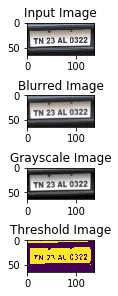

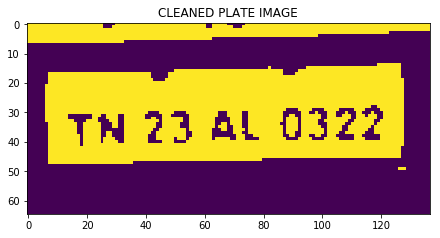

 
TN23AL0322


In [0]:
a=[np.array(plateImage)]
#a=random.choices(Plates,k=20)#uncomment this to test 20 random sample images
for i in range(len(a)):
  #print("Image Index: ",Plates.index(a[i]))
  img = Image.fromarray(a[i])
  processed_img = preprocess(img)
  calc(processed_img)

# **CHECK FOR STOLEN/LOST VEHICLES**

In [0]:
!pip install bs4

In [0]:
import requests 
from bs4 import BeautifulSoup


query="DL2SP3463"#stolen vehicle present in database

#query=detected_plates[0]  #uncomment to use detected plate as query(might not be present in database as it may not be stolen)

URL = "https://www.zipnet.in/index.php?page=stolen_vehicles_search&criteria=search&rg_no="+query
r = requests.get(URL,allow_redirects = True,verify=False)
soup = BeautifulSoup(r.content, 'html5lib')
table=soup.find(lambda tag:tag.name=="table" and "State" in tag.text,{"id": "AutoNumber6"})
if table==None:
  print(" ")
  print("Vehicle Not Found In The Database")
else:
  tbody=table.find('tbody')
  tbody2=tbody.find('tbody')
  tr1=tbody2.findAll('tr')
  dictionary={}
  for tr in tr1:
    td=tr.findAll('td')
    for i in range(0,len(td),2):
      dictionary[td[i].text.strip()]=td[i+1].text.strip()
  
  
  print(" ")
  print("STOLEN/LOST VEHICLE DETAILS ARE BELOW")
  print(" ")
  for key,value in dictionary.items():
    print(key,':',value)

 
STOLEN/LOST VEHICLE DETAILS ARE BELOW
 
Control Room No : 
State : DELHI
FIR Number : 028486
District : Crime Branch, Delhi
FIR Date : 08/12/2019
Police Station : e-Police Station MV Theft
Vehicle Type : SCOOTER
Registration Number : DL2SP3463
Vehicle Make : HONDA MOTORCYCLE AND SCOOTER
Engine Number : JF50E83054764
Vehicle Model : Not Availa
Chassis Number : ME4JF505CG8054445
Vehicle Color : BROWN
Phone Number : 9999071122
Complainant : Prem Prakash Kaim
Address : 500/3 C-1 block-30 street no-7, vishwas nagar, shahdara,east delhi-110032
Stolen From : 153/2,patparganj village,mayur vihar ph-1,delhi-91
Status : Stolen
Report Date/Time on ZIPNET : 12/08/2019 12:00.00 AM


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
